In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


As part of our analysis, we need to find the current and next year's Top 10 programming languages by analyzing the `LanguagesHaveWorkedWith` and `LanguagesWantToWorkeWith` columns from our Stack Overflow developer survey data.

In [6]:
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                     1002
Python                                                                              832
HTML/CSS;JavaScript;PHP;SQL                                                         503
C#                                                                                  452
HTML/CSS;JavaScript                                                                 452
                                                                                   ... 
C#;JavaScript;Lua                                                                     1
C;HTML/CSS;JavaScript;Julia;PowerShell;Python;TypeScript                              1
Bash/Shell (all shells);Go;HTML/CSS;JavaScript;Python;Ruby;Scala;SQL;TypeScript       1
Assembly;C++;Go;HTML/CSS;JavaScript;Julia;Lisp;PHP;Prolog;Rust;SQL;TypeScript         1
Assembly;C;C++;Rust;VBA                                                               1
Name: cou

By looking at the data we can see that the survey allowed to select multiple options at once so we need to split the data using the `.str.split()` method which then returns a list of elements. Then we use the `.explode` method to explode the list into separate rows. To avoid repeating the same step we will simply write a function that does the task for us.

In [13]:
def get_top_10(df, column_name):
    # 1. Drop missing values (List-wise deletion strategy)
    data = df[column_name].dropna()

    # 2. Split string "Python;SQL" -> list ["Python", "SQL"]
    data = df[column_name].str.split(';')

    # 3. Explode list into separate rows
    exploded_data = data.explode()

    # 4. Count and take top 10
    return exploded_data.value_counts().head(10)

top_current = get_top_10(df, 'LanguageHaveWorkedWith')
top_future = get_top_10(df, 'LanguageWantToWorkWith')

top_current.head(5)

LanguageHaveWorkedWith
JavaScript    37492
HTML/CSS      31816
Python        30719
SQL           30682
TypeScript    23150
Name: count, dtype: int64

In [14]:
type(top_current)

pandas.core.series.Series

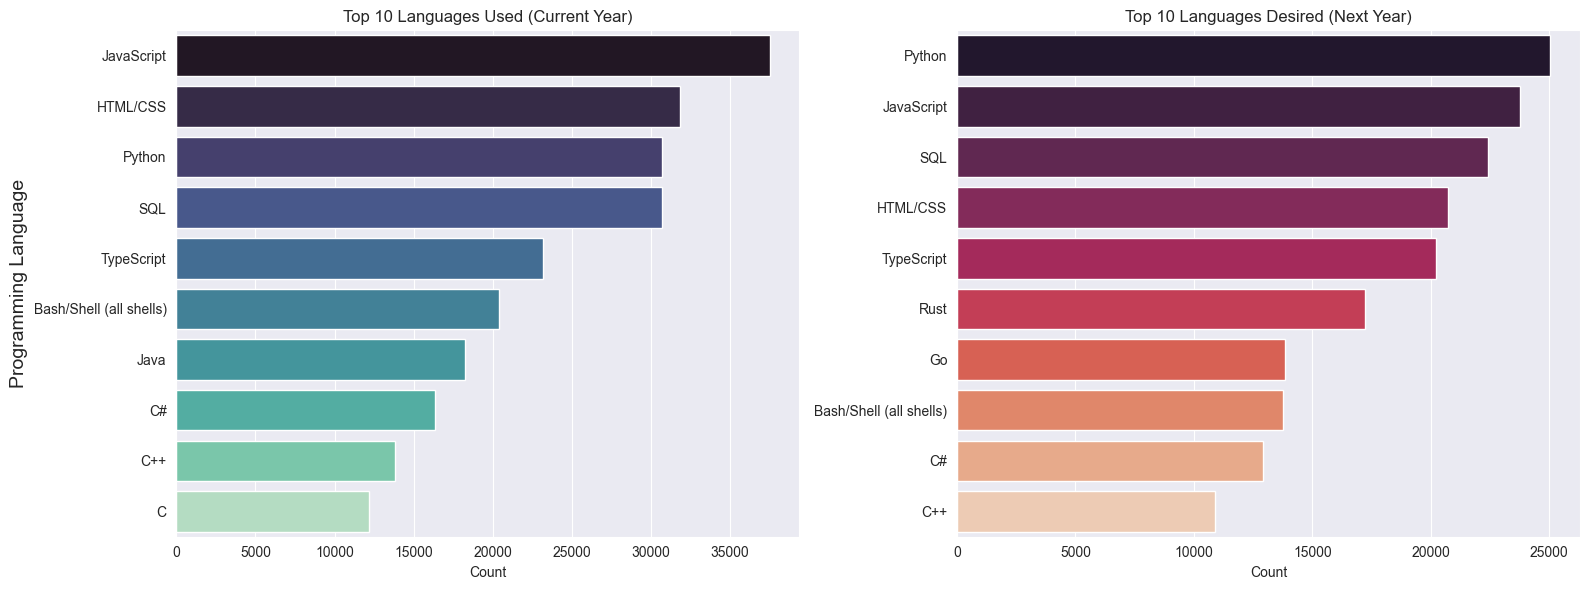

In [35]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Current Year
sns.barplot(x=top_current.values, y=top_current.index, ax=axes[0], palette='mako', hue=top_current.index, legend=False)
axes[0].set_title('Top 10 Languages Used (Current Year)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Programming Language', fontsize=14)

sns.barplot(x=top_future.values, y=top_future.index, ax=axes[1], palette='rocket', hue=top_current.index, legend=False)
axes[1].set_title('Top 10 Languages Desired (Next Year)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

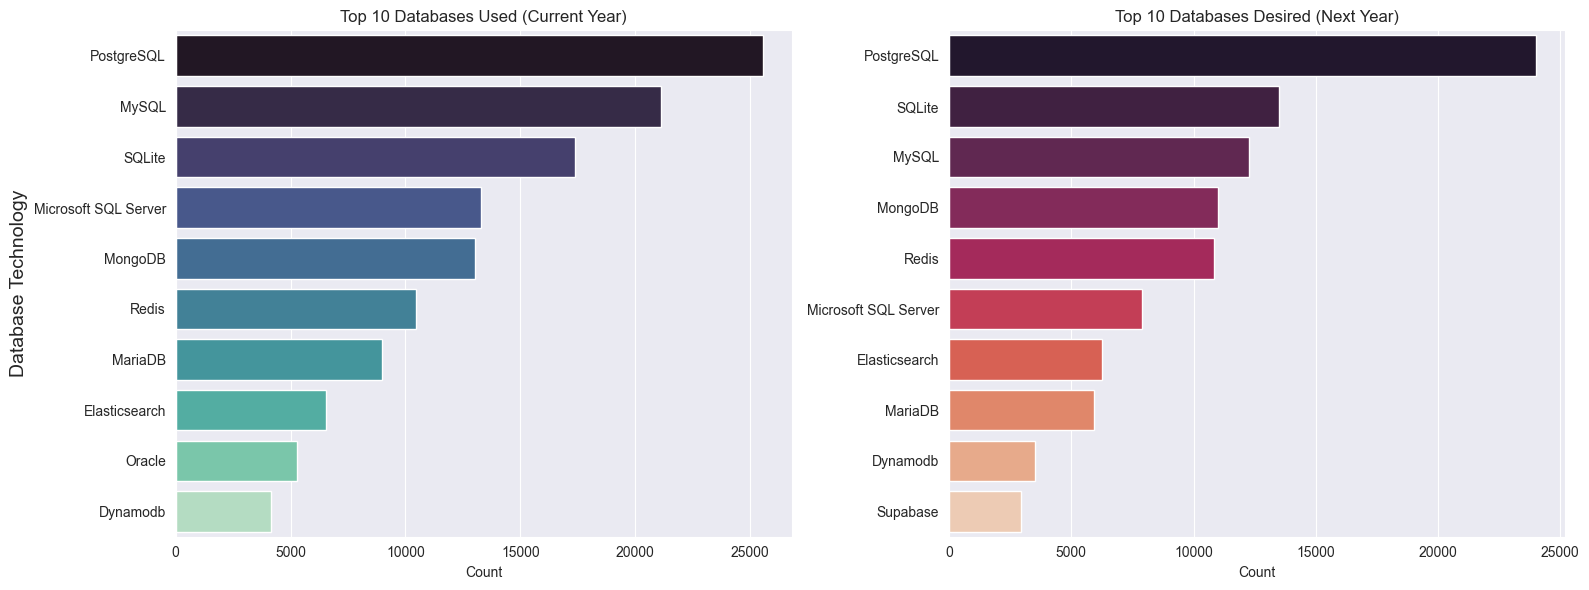

In [36]:
# Re-using the get_top_10 function from the previous step
top_db_current = get_top_10(df, 'DatabaseHaveWorkedWith')
top_db_future = get_top_10(df, 'DatabaseWantToWorkWith')

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Current Year (Using 'mako' - Cool Blues)
sns.barplot(x=top_db_current.values, y=top_db_current.index, ax=axes[0], palette='mako', hue=top_db_current.index, legend=False)
axes[0].set_title('Top 10 Databases Used (Current Year)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Database Technology', fontsize=14)

# Chart 2: Next Year (Using 'rocket' - Warm Purples)
sns.barplot(x=top_db_future.values, y=top_db_future.index, ax=axes[1], palette='rocket', hue=top_db_future.index, legend=False)
axes[1].set_title('Top 10 Databases Desired (Next Year)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()